In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import joblib

In [4]:
# Load the dataset
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [6]:
# Step 1: Data Exploration
print("Initial DataFrame Info:")
print(train_df.info())  # Check the info of the dataframe
print("Initial DataFrame Summary Statistics:")
print(train_df.describe())  # Get summary statistics

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Initial DataFrame Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.3

In [8]:
# Drop unnecessary columns that contain string data
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [149]:
# Avoid FutureWarning by using dictionary syntax in the fillna method
train_df.fillna({'Age': train_df['Age'].median(), 'Fare': train_df['Fare'].median()}, inplace=True)

# Handle 'Embarked' only if it exists
if 'Embarked' in train_df.columns:
    train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
else:
    print("Warning: 'Embarked' column is missing in the dataset.")

In [28]:
# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Check the processed DataFrame
print("Processed DataFrame:")
print(train_df.head())  # Print the first few rows of the processed DataFrame
print("Processed DataFrame Info:")
print(train_df.info())  # Check that all columns are numeric now

Processed DataFrame:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  
Processed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          8

In [127]:
# Separate features and target variable
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Verify all features are numeric
print("Features Data Types:")
print(X.dtypes)

Features Data Types:
PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [129]:
# Step 3: Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)

In [155]:
# Increase max_iter to 500
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

C:\Users\dell\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [137]:
# Step 4: Model Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display model evaluation metrics
print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}')

Accuracy: 0.80, Precision: 0.77, Recall: 0.73, F1 Score: 0.75, ROC AUC: 0.88


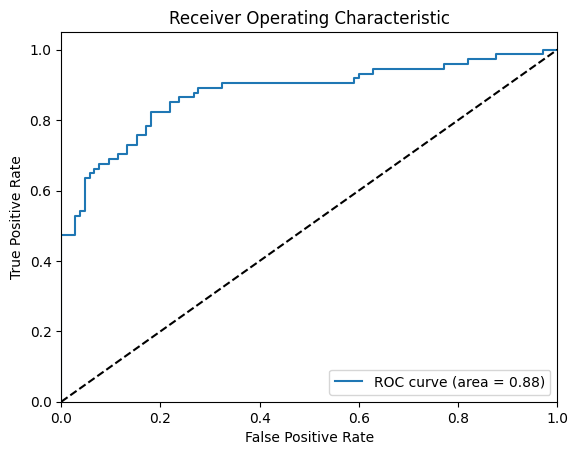

In [139]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [141]:
# Step 5: Interpretation
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print("Logistic Regression Coefficients:")
print(coefficients)
significant_features = coefficients[coefficients['Coefficient'] != 0]
print('Significant features:')
print(significant_features)

Logistic Regression Coefficients:
             Coefficient
PassengerId     0.000373
Pclass         -0.934339
Age            -0.029953
SibSp          -0.298084
Parch          -0.123580
Fare            0.003260
Sex_male       -2.530696
Embarked_Q      0.115109
Embarked_S     -0.284080
Significant features:
             Coefficient
PassengerId     0.000373
Pclass         -0.934339
Age            -0.029953
SibSp          -0.298084
Parch          -0.123580
Fare            0.003260
Sex_male       -2.530696
Embarked_Q      0.115109
Embarked_S     -0.284080


In [157]:
# Save the model
joblib.dump(model, 'titanic_model.pkl')

# Check if the file was created
import os
print("File exists:", os.path.isfile('titanic_model.pkl'))

File exists: True
